<font color='yellow'>
Exploratory Data Analysis¶
Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.

We shouldn't limit our EDA to these 10 questions. Let's be creative :).
</font>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import shapiro as sh
import seaborn as sns
from sqlalchemy import create_engine
pd.options.display.max_columns=200
pd.set_option('display.max_rows', None)

In [62]:
POSTGRES_ADDRESS = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'lhl_student' 
POSTGRES_PASSWORD = 'lhl_student'
POSTGRES_DBNAME = 'mid_term_project'

In [63]:
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
      .format(username=POSTGRES_USERNAME,
       password=POSTGRES_PASSWORD,
       ipaddress=POSTGRES_ADDRESS,
       port=POSTGRES_PORT,
       dbname=POSTGRES_DBNAME))
# Create the connection
database = create_engine(postgres_str)

In [64]:
# def execute_read_query(connection, query, return_pandas=True):
#     cursor = connection.cursor()
#     result = None
#     try:
#         if return_pandas:
#             result = pd.read_sql_query(query, connection)
#         else:
#             cursor.execute(query)
#             result = cursor.fetchall()
#              result=pd.DataFrame(result)  
#         return result
#     except Error as e:
#         print(f"The error '{e}' occurred")

In [65]:
data=pd.read_csv("/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/data.csv")
data.head(5)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance.1,ramp_to_ramp,air_time.1,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id.1,origin_city_market_id,origin.1,origin_city_name.1,origin_country,origin_country_name,dest_airport_id.1,dest_city_market_id,dest.1,dest_city_name.1,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source,month.1,airline_id.1,unique_carrier.1,carrier.1,carrier_name.1,carrier_group_new.1,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year.1
0,2018-05-24,UA,UA,UA,499,UA,N433UA,499,14689,SBA,"Santa Barbara, CA",14771,SFO,"San Francisco, CA",710,704.0,-6.0,28.0,732.0,818.0,9.0,821,827.0,6.0,0.0,NaN,0.0,N,71.0,83.0,46.0,1.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,20210.0,76.0,73.0,46.0,0.0,1316.0,170.0,156.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,14689,34689,SBA,"Santa Barbara, CA",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,638,1,2019,11,3,F,DU,12,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
1,2018-05-24,UA,UA,UA,499,UA,N433UA,499,14689,SBA,"Santa Barbara, CA",14771,SFO,"San Francisco, CA",710,704.0,-6.0,28.0,732.0,818.0,9.0,821,827.0,6.0,0.0,NaN,0.0,N,71.0,83.0,46.0,1.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,20210.0,76.0,73.0,46.0,0.0,1316.0,170.0,156.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,14689,34689,SBA,"Santa Barbara, CA",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,638,1,2019,11,3,F,DU,11,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
2,2018-05-24,UA,UA,UA,499,UA,N433UA,499,14689,SBA,"Santa Barbara, CA",14771,SFO,"San Francisco, CA",710,704.0,-6.0,28.0,732.0,818.0,9.0,821,827.0,6.0,0.0,NaN,0.0,N,71.0,83.0,46.0,1.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,20210.0,76.0,73.0,46.0,0.0,1316.0,170.0,156.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,14689,34689,SBA,"Santa Barbara, CA",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,638,1,2019,11,3,F,DU,10,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
3,2018-05-24,UA,UA,UA,499,UA,N433UA,499,14689,SBA,"Santa Barbara, CA",14771,SFO,"San Francisco, CA",710,704.0,-6.0,28.0,732.0,818.0,9.0,821,827.0,6.0,0.0,NaN,0.0,N,71.0,83.0,46.0,1.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,20210.0,76.0,73.0,46.0,0.0,1316.0,170.0,156.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines Inc.,2,2,14689,34689,SBA,"Santa Barbara, CA",US,United States,11298,30194,DFW,"Dallas/Fort Worth, TX",US,United States,6,638,1,2019,11,3,F,DU,9,20378.0,YV,YV,Mesa Airlines Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018
4,2018-05-24,UA,UA,UA,499,UA,N433UA,499,14689,SBA,"Santa Barbara, CA",14771,SFO,"San Francisco, CA",710,704.0,-6.0,28.0,732.0,818.0,9.0,821,827.0,6.0,0.0,NaN,0.0,N,71.0,83.0,46.0,1.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,20210.0,76.0,73.0,46.0,0.0,1316.0,170.0,156.0,YV,20378,Mesa Airlines Inc.,D,YV,Mesa Airlines

In [66]:
data.columns.values.tolist()

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name',
 'departures_scheduled',
 'departures_performed',
 'payload',
 'seats',
 'passengers',
 'freight',
 'mail',
 'distance.1',
 'ramp_to_ramp',
 'air_time.1',
 'unique_carrier',
 'airline_id',
 'unique_carrier_name',
 'region',
 'carrier',
 'carrier_name',
 'carrier_group',
 'carrier_group_new',
 'o

In [122]:
df_flights = pd.read_csv("/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/flights.csv")
df_flights.shape

(100000, 42)

In [123]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-27,AA,AA_CODESHARE,AA,5052,OH,N557NN,5052,11057,CLT,"Charlotte, NC",11995,GSO,"Greensboro/High Point, NC",1634,1628.0,-6.0,25.0,1653.0,1724.0,5.0,1733,1729.0,-4.0,0,NaN,0,N,59,61.0,31.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-26,AA,AA_CODESHARE,AA,5812,YV,N952LR,5812,13851,OKC,"Oklahoma City, OK",11298,DFW,"Dallas/Fort Worth, TX",1652,1732.0,40.0,13.0,1745.0,1819.0,7.0,1802,1826.0,24.0,0,NaN,0,N,70,54.0,34.0,1,175,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN
2,2018-10-25,WN,WN,WN,1270,WN,N962WN,1270,15304,TPA,"Tampa, FL",14730,SDF,"Louisville, KY",955,949.0,-6.0,21.0,1010.0,1150.0,5.0,1155,1155.0,0.0,0,NaN,0,N,120,126.0,100.0,1,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-25,DL,DL,DL,2031,DL,N979AT,2031,10397,ATL,"Atlanta, GA",15624,VPS,"Valparaiso, FL",1342,1401.0,19.0,30.0,1431.0,1414.0,10.0,1353,1424.0,31.0,0,NaN,0,N,71,83.0,43.0,1,250,0.0,19.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019-11-20,B6,B6,B6,2705,B6,N547JB,2705,11618,EWR,"Newark, NJ",11697,FLL,"Fort Lauderdale, FL",1646,1705.0,19.0,12.0,1717.0,1934.0,8.0,1952,1942.0,-10.0,0,NaN,0,N,186,157.0,137.0,1,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df_flights_origin_and_date_unique = df_flights[['dep_time', 'origin_city_name']].drop_duplicates()
df_flights_origin_and_date_unique.head()

,dep_time,origin_city_name
0,1628.0,"Charlotte, NC"
1,1732.0,"Oklahoma City, OK"
2,949.0,"Tampa, FL"
3,1401.0,"Atlanta, GA"
4,1705.0,"Newark, NJ"


In [135]:
df_flights_origin_and_date_unique.shape

(51659, 2)

In [100]:
df_delays = df_flights['arr_delay'] - df_flights['dep_delay']
type(df_delays)
df_delays1 = pd.DataFrame(data=df_delays)
type(df_delays1)

pandas.core.frame.DataFrame

In [101]:
df_delays1.columns

RangeIndex(start=0, stop=1, step=1)

In [69]:
df_passengers = pd.read_csv("/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/passengers.csv")
df_passengers.shape

(100000, 38)

In [70]:
df_fuelconsumption = pd.read_csv("/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/fuel_consumption.csv")
df_fuelconsumption.shape

(3035, 25)

In [71]:
#df_flights.isnull().sum()

In [72]:
#df_passengers.isnull().sum()

In [73]:
#df_fuelconsumption.isnull().sum()

<font color='yellow'>Task 1: Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.</font.

In [74]:
#After trying the shapiro test, we failed to reject the shapiro test
shapiro_test_dep = sh(data.dep_delay)
shapiro_test_dep

/Users/annajose/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:xlabel='dep_delay', ylabel='Count'>

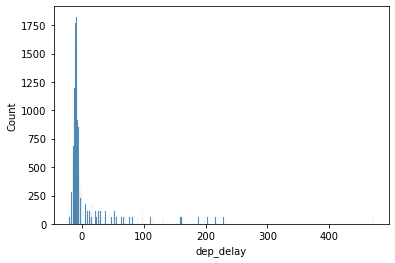

In [75]:
sns.histplot(data = data, x='dep_delay', log_scale = False)

In [18]:
shapiro_test_arr = sh(data.arr_delay)
shapiro_test_arr

/Users/annajose/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

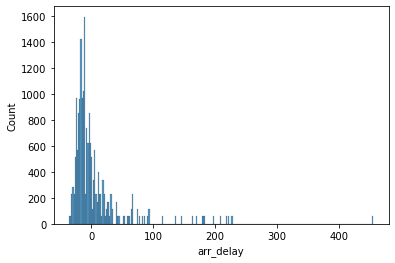

In [19]:
sns.histplot(data = data, x='arr_delay')

<AxesSubplot:xlabel='weather_delay', ylabel='Count'>

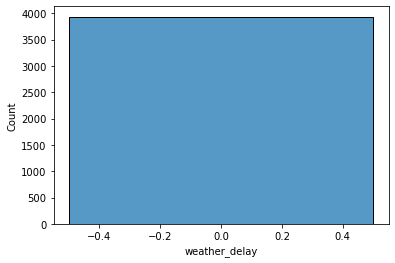

In [20]:
sns.histplot(data = data, x='weather_delay')

In [ ]:
#.............................................................END OF TASK 1................................................................................................

Task 2: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
df_flights['fl_date'] = pd.to_datetime(df_flights['fl_date'], errors='coerce')
df_flights['fl_date']

In [ ]:
df_flights['month'] = df_flights['fl_date'].dt.month
df_flights['month']

In [ ]:
df_flights['year'] = df_flights['fl_date'].dt.year
df_flights['year']

In [ ]:
yr_mon_dep_delay = df_flights[['year','month', 'dep_delay']]
yr_mon_dep_delay

In [ ]:
yr_dep_delay = yr_mon_dep_delay[['dep_delay', 'year']].groupby('year').mean().reset_index()
yr_dep_delay

In [ ]:
month_dep_delay = yr_mon_dep_delay[['dep_delay', 'month']].groupby('month').mean().reset_index()
month_dep_delay[['dep_delay', 'month']].max().to_list()

In [ ]:
#///////////////////////////////////////////////////////////////////

In [ ]:
import datetime

In [ ]:
df_task2=df_flights.copy(deep=True)
df_task2.head()

In [ ]:
df_task2['fl_date']=pd.to_datetime(df_task2['fl_date'])
df_task2['month']=df_task2['fl_date'].dt.month

In [ ]:
df_mean=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).mean()
df_median=df_task2[['month', 'dep_delay','arr_delay']].groupby(['month']).median()

In [ ]:
df_mean.head()

In [ ]:
import plotly.express as go

In [ ]:
fig=plt.subplots(figsize=(10, 6))

sns.barplot(x=df_mean.index, y=df_mean['arr_delay'])

In [ ]:

fig=plt.figure(figsize=(10, 6))

sns.barplot(x=df_mean.index, y=df_mean['dep_delay'])

In [ ]:
#.............................................................END OF TASK 2................................................................................................

<font color='yellow'>Task 3: Does the weather affect the delay?
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
</font>

<font color='yellow'>
sunny
cloudy
rainy
snow. 
</font>
    
<font color='yellow'>Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?</font>

In [103]:
# Import required Libraries
import pandas as pd
import os
from pandas import json_normalize
import json
import requests
from IPython.display import JSON

In [108]:
#### REFORMAT DATE AND TIME FOR VISUAL CROSSING
def format_departure_time(x):
    str_time = str(x['crs_dep_time'])
    new_time = str_time.rjust(4, '0')
    return x['fl_date'] + 'T' + new_time[0:2] + ':' + new_time[2:4] + ':00'

def format_arrival_time(x):
    str_time = str(x['crs_arr_time'])
    new_time = str_time.rjust(4, '0')
    return x['fl_date'] + 'T' + new_time[0:2] + ':' + new_time[2:4] + ':00'

df_flights['new_dep_time'] = df_flights.apply(format_departure_time, axis=1)
df_flights['new_arr_time'] = df_flights.apply(format_arrival_time, axis=1)

In [109]:
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,new_dep_time,new_arr_time
0,2019-11-27,AA,AA_CODESHARE,AA,5052,OH,N557NN,5052,11057,CLT,"Charlotte, NC",11995,GSO,"Greensboro/High Point, NC",1634,1628.0,-6.0,25.0,1653.0,1724.0,5.0,1733,1729.0,-4.0,0,NaN,0,N,59,61.0,31.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-27T16:34:00,2019-11-27T17:33:00
1,2019-12-26,AA,AA_CODESHARE,AA,5812,YV,N952LR,5812,13851,OKC,"Oklahoma City, OK",11298,DFW,"Dallas/Fort Worth, TX",1652,1732.0,40.0,13.0,1745.0,1819.0,7.0,1802,1826.0,24.0,0,NaN,0,N,70,54.0,34.0,1,175,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,2019-12-26T16:52:00,2019-12-26T18:02:00
2,2018-10-25,WN,WN,WN,1270,WN,N962WN,1270,15304,TPA,"Tampa, FL",14730,SDF,"Louisville, KY",955,949.0,-6.0,21.0,1010.0,1150.0,5.0,1155,1155.0,0.0,0,NaN,0,N,120,126.0,100.0,1,727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-25T09:55:00,2018-10-25T11:55:00
3,2018-06-25,DL,DL,DL,2031,DL,N979AT,2031,10397,ATL,"Atlanta, GA",15624,VPS,"Valparaiso, FL",1342,1401.0,19.0,30.0,1431.0,1414.0,10.0,1353,1424.0,31.0,0,NaN,0,N,71,83.0,43.0,1,250,0.0,19.0,12.0,0.0,0.0,NaN,NaN,NaN,NaN,2018-06-25T13:42:00,2018-06-25T13:53:00
4,2019-11-20,B6,B6,B6,2705,B6,N547JB,2705,11618,EWR,"Newark, NJ",11697,FLL,"Fort Lauderdale, FL",1646,1705.0,19.0,12.0,1717.0,1934.0,8.0,1952,1942.0,-10.0,0,NaN,0,N,186,157.0,137.0,1,1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-20T16:46:00,2019-11-20T19:52:00


In [110]:
#### GET WEATHER FROM ORIGIN

def get_weather_origin(x):
    response = requests.get(
        'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history',
        params={
            'aggregateHours': '1',
            'startDateTime': x['new_dep_time'],
            'unitGroup': 'us',
            'contentType': 'json',
            'locations': x['origin_city_name'],
            'key': 'NCM5ESCK9CLLLUQU8N28PLD8K'
        }
    )
    
    if response.status_code == 200:
        json = response.json()
        for i in json['locations'].values():
            for j in i['values']:
                return j['conditions']

In [111]:
#### GET WEATHER FROM DESTINATION

def get_weather_destination(x):
    response = requests.get(
        'https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history',
        params={
            'aggregateHours': '1',
            'startDateTime': x['new_arr_time'],
            'unitGroup': 'us',
            'contentType': 'json',
            'locations': x['dest_city_name'],
            'key': 'NCM5ESCK9CLLLUQU8N28PLD8K'
        }
    )
    
    if response.status_code == 200:
        json = response.json()
        for i in json['locations'].values():
            for j in i['values']:
                return j['conditions']

In [119]:
df_weathertype = df_flights.iloc[500:505,:].copy()
df_weathertype['weather_condition_origin'] = ''
df_weathertype['weather_condition_dest'] = ''
df_weathertype['weather_condition_origin'] = df_flights.apply(get_weather_origin, axis=1)
df_weathertype['weather_condition_dest'] = df_flights.apply(get_weather_destination, axis=1)

In [ ]:
# # Weather API Fetch Function
# def world_weather_fetch(q, date):
    
#     # Set Key
#     weather_key = 'e058d887c98c44e2922155113212905'
        
#     # Set Parameters for API
#     weather_url = "https://api.worldweatheronline.com/premium/v1/past-weather.ashx"
#     location = 'q'
#     weather_response = requests.get(weather_url,params={
#                                                   'q':location,
#                                                   'date':'2019-01-01',
#                                                   'key':weather_key,  
#                                                   'format':'json',
#                                                   })
        
#     #Call API and direct returned information
#     weather_result = weather_response.json()
#     df_weather = json_normalize(weather_result)
#     return weather_result, df_weather

In [ ]:
# world_weather_fetch('Greensboro/High Point', '2019-01-01')

In [ ]:
# weather_response = requests.get('https://api.worldweatheronline.com/premium/v1/past-weather.ashx',params={
#                                                   'q':'Greensboro,NC',
#                                                   'date':'2019-01-01',
#                                                   'key':'e058d887c98c44e2922155113212905',  
#                                                   'format':'json',
#                                                   })
# weather_result = weather_response.json()
# df_weather = json_normalize(weather_result)

In [ ]:
# with open('weather.json', 'w') as f:
#     json.dump(weather_result, f)

In [ ]:
# # Reading JSON
# df=pd.read_json('weather.json')
# df

In [ ]:
# weather_result

In [ ]:
#df[‘month’] = df['date'].apply(lambda x: x.month)

In [83]:
# weather_result['data']['weather'][0]['hourly'][0]['weatherDesc']

In [84]:
# def weather_forecast(row):
#     date = row.fl_date
#     location_dest=row.dest
#     time_arr=row.arr_time
#     time_dest=row.dest_time
#     location_arr=row.arr
#     weather_response = requests.get('https://api.worldweatheronline.com/premium/v1/past-weather.ashx',params={
#                                                   'q':location_dest,
#                                                   'date':date,
#                                                   'key':'e058d887c98c44e2922155113212905',
#                                                   'tp':1,
#                                                   'format':'json',
#                                                   })
    
#     weather_by_date=weather_result['data']['weather'][0]['hourly'][0]['weatherDesc']
    
#     return weather_by_date_and_time
# df_flights['weather'] = df_flights.apply(lambda x: weather_forecast(x))

In [ ]:
weather_forecast([1])

In [ ]:
df_weather

In [ ]:
df_weather.iloc[0,1]

In [ ]:
weather_response

In [ ]:
df_weather

In [ ]:
df_weather

In [ ]:
df_weather['data.request'].to_list()

In [ ]:
locations = list(df_flights.dest_city_name.unique())
locations

In [ ]:
#.............................................................END OF TASK 3................................................................................................

In [ ]:
#Task 4: How taxi times changing during the day? Does higher traffic lead to bigger taxi times? 

In [ ]:
df_flights['total_taxi'] = df_flights['taxi_out']+df_flights['taxi_in']

In [ ]:
sns.scatterplot(data=df_flights, x=df_flights['total_taxi'], y=df_flights['dep_delay'])

In [ ]:
#///////////////////////////////////////////////////////////////////

In [ ]:
df_task4=df_flight.copy(deep=True)

In [ ]:
taxi_out=df_task4.groupby(['origin']).agg({'taxi_out':['count', 'mean']}).reset_index()
taxi_out

In [ ]:
import plotly.express as go
plt.figure(figsize=(12, 8))

fig=go.scatter(x=taxi_out[('taxi_out', 'count')], y=taxi_out[('taxi_out', 'mean')], color=taxi_out['origin'])
fig.show()

In [ ]:
taxi_in=df_task4.groupby(['dest']).agg({'taxi_in':['count', 'mean']}).reset_index()

plt.figure(figsize=(12, 8))

fig=go.scatter(x=taxi_in[('taxi_in', 'count')], y=taxi_in[('taxi_in', 'mean')], color=taxi_in['dest'])
fig.show()

In [ ]:
#.............................................................END OF TASK 4................................................................................................

In [ ]:
#Task 5: What is the average percentage of delays that is already created before departure? (aka are arrival delays 
#caused by departure delays?) Are airlines able to lower the delay during the flights?

In [ ]:
total_delay = df_flights['arr_delay'] + df_flights['dep_delay']

In [ ]:
print('total delays from arrival delay is: ' + str(df_flights['arr_delay'].sum()/total_delay.sum() * 100) + '%')

In [ ]:
#///////////////////////////////////////////////////////////////////

In [ ]:
features = [
 'fl_date',
 'mkt_carrier',
 'dep_delay',
 'taxi_out',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'distance']
delays = df_flights[features]

In [ ]:
delays.head()

In [ ]:
delays['delays_sum']=delays['arr_delay']+delays['dep_delay']
delays['make_up_times']=''
for i in delays.index:
    if delays._get_value(i, 'dep_delay')>0:
        if delays._get_value(i, 'dep_delay')<=delays._get_value(i, 'arr_delay'):
            delays._set_value(i, 'make_up_times', 'no')
        
        else:
            delays._set_value(i, 'make_up_times', 'yes')
    else:
        delays._set_value(i, 'make_up_times', 'no departure delay')

In [ ]:
delays.head()

In [ ]:
delays.groupby('mkt_carrier').count()

In [ ]:
delays['mkt_carrier'].unique()

In [ ]:
# airlines that make up for delays

airline_dep_delays={'AA':[0,0,0], 'DL':[0,0,0], 'B6':[0,0,0], 'AS':[0,0,0], 'HA':[0,0,0], 'UA':[0,0,0], 'NK':[0,0,0], 'WN':[0,0,0], 'G4':[0,0,0]}

for i in delays.index:
    if delays._get_value(i, 'make_up_times')=='yes':
        airline_dep_delays[delays._get_value(i,'mkt_carrier')][0] +=1
    
    elif delays._get_value(i, 'make_up_times')=='no':
        airline_dep_delays[delays._get_value(i,'mkt_carrier')][1] +=1
    
    else: 
        airline_dep_delays[delays._get_value(i,'mkt_carrier')][2] +=1
        
#k[0] is when dep_delay is greater than arrival delay but it is managed to arrive shorter delay than the departure
#k[1] is when there is a departure delay but the plane arrives with no delay to its destination.
for j, k in airline_dep_delays.items():
    print(f'{j} is able to make up for departure delay upto: {round(k[0]/(k[0]+k[1])*100)} % of the time')

In [ ]:
# Finding the delays when departuring

# k[2] is when the plane leaves without delay

for j, k in airline_dep_delays.items():
    print(f'{j} gets delayed at departure upto: {round((k[0]+k[1])/(k[0]+k[1]+k[2])*100)} % of the time')

In [ ]:
#.............................................................END OF TASK 5................................................................................................

In [ ]:
#Task 6: How many states cover 50% of US air traffic?

In [ ]:
destinations = df_flights['dest_city_name'].str.rsplit(",", n=1, expand=True)
destinations

In [ ]:
states = destinations.loc[:,1]

In [ ]:
states.value_counts().head(5)

In [ ]:
#///////////////////////////////////////////////////////////////////

In [ ]:
df_task6=df_flights.copy(deep=True)

In [ ]:
df_task6.columns

In [ ]:
#There is no column for for states, but we can use the columns for origin and destination cities
df_task6[['origin_city_name', 'dest_city_name']].head()

In [ ]:
#Spliting the codes from state's name
df_task6['origin_state']=df_task6['origin_city_name'].apply(lambda x: x.split(', ')[1])
df_task6['destination_state']=df_task6['dest_city_name'].apply(lambda x: x.split(', ')[1])
df_task6.head()

In [ ]:
# counting the number of flights based on origin and destination
flights_per_state_origin=df_task6.groupby('origin_state')['fl_date'].count().sort_values(ascending=False)
flights_per_state_destination=df_task6.groupby('destination_state')['fl_date'].count().sort_values(ascending=False)

In [ ]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_origin.values/million, y=flights_per_state_origin.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Origin State')

In [ ]:
ax=plt.subplots(figsize=(15, 12))
million=1000000
ax=sns.barplot(x=flights_per_state_destination/million, y=flights_per_state_destination.index)
ax.set_title('Number of Flights Based On States', fontsize=14)
ax.set_xlabel('Flights Per Million')
ax.set_ylabel('Destination State')

In [ ]:
#Counting the top states with most air traffic in the US
total_flights=flights_per_state_origin + flights_per_state_destination
flight_perc=total_flights.sum()*0.5
states=[]
total=0
num=False

In [ ]:
for state, number in total_flights.sort_values(ascending=False).items():
    if total<=flight_perc:
        states.append(state)
        total +=number
        
    if total > flight_perc:
        num =True
    
    elif num == True:
        break

print('States that cover 50% of US Air Traffic:')
for state in states:
    print(state)

In [ ]:
#.............................................................END OF TASK 6................................................................................................

In [ ]:
#Task 7: Test the hypothesis whether planes fly faster when there is the departure delay?

In [ ]:
from scipy import stats

In [ ]:
air_time = df_flights['air_time']

In [ ]:
dep_delay = df_flights['dep_delay']

In [ ]:
sns.scatterplot(data=df_flights, x=dep_delay, y=air_time)

In [ ]:
#///////////////////////////////////////////////////////////////////

In [ ]:
df_task7=df_flights.copy(deep=True)
df_task7.head()

In [ ]:
df_task7['air_time'].sort_values(ascending=False)

In [ ]:
df_task7['flight_speed']=(df_task7['distance']/df_task7['air_time'])*60

In [ ]:
df_task7['flight_speed'].sort_values(ascending=False)

In [ ]:

#flight speed with and without delays
flightspeed_with_delay=df_task7.loc[(df_task7['dep_delay']>0), 'flight_speed']
flightspeed_without_delay=df_task7.loc[(df_task7['dep_delay']==0), 'flight_speed']

In [ ]:
stats.f_oneway(flightspeed_with_delay, flightspeed_without_delay)

In [ ]:
stats.ttest_ind(flightspeed_with_delay, flightspeed_without_delay)
#Result: The null hypothesis is not rejected because the P-value is greater than alpha.

In [ ]:
#.............................................................END OF TASK 7................................................................................................

In [ ]:
#Task 8: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [ ]:
df_flights['hour_departure'] = df_flights['dep_time'].apply(
lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [ ]:
long = df_flights[df_flights['air_time'].between(400, 659)]

In [ ]:
medium = df_flights[df_flights['air_time'].between(200,399)]

In [ ]:
short = df_flights[df_flights['air_time'].between(0,199)]

In [ ]:
commonhr_long = long.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_long

In [ ]:
commonhr_medium = medium.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_medium.head()

In [ ]:
commonhr_short = short.groupby('hour_departure').size().sort_values(ascending = False)
commonhr_short.head()

In [ ]:
#//////////////////////////////////////////////////

In [ ]:
df_task8=df_flights.copy(deep=True)
df_task8.columns

In [ ]:
df_task8.head()

In [ ]:
#convert to datetime
def convert_time(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'   
    string = str(int(x))
    
    if len(string)< 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [ ]:
#get dep_hr again
df_task8['fl_date'] = pd.to_datetime(df_task8['fl_date'], format='%Y-%m-%d')

df_task8['dep_time'] = df_task8['dep_time'].apply(lambda x: convert_time(x))
df_task8['dep_time'] = pd.to_datetime(df_task8['dep_time'], format='%H:%M')
df_task8['dep_hr'] = df_task8['dep_time'].dt.hour

In [ ]:
#short flights:30 mins to 3 hours
#medium flights: 3 hourst to 6 hours
#long flights: above 6 hours
short_flights=df_task8[df_task8['air_time']<=180]
medium_flights=df_task8[(df_task8['air_time']> 180) & (df_task8['air_time']<=360)]
long_flights=df_task8[df_task8['air_time']>=360]

In [ ]:
short_time=short_flights.groupby(by=[short_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
med_time=medium_flights.groupby(by=[medium_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)
long_time=long_flights.groupby(by=[long_flights['dep_hr']])['taxi_out'].count().sort_values(ascending=False)

In [ ]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=short_time.index, y=short_time.values, color='r')
ax.set_title('Short Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

In [ ]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=med_time.index, y=med_time.values, color='r')
ax.set_title('Medium Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

In [ ]:
fig, ax=plt.subplots(figsize=(10, 6))

sns.barplot(ax=ax, x=long_time.index, y=long_time.values, color='r')
ax.set_title('Long Flights in Different Hours')
ax.set_xlabel('Hours during the days')
ax.set_ylabel('Number of flights')

In [ ]:
#..........................................................................................END OF TASK 8................................................................................................

In [ ]:
#Task 9: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of 
#passengers went through the particular airport? How much traffic do these 10 airports cover?

In [ ]:
busiest_airport = df_flights.groupby('dest').size().sort_values(ascending = False)
busiest_airport

In [ ]:
df_passengers = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/passengers.csv')

In [ ]:
pass_numb_dest = df_passengers[['passengers', 'dest']].groupby('dest').sum().reset_index()

In [ ]:
pass_numb_dest.sort_values(by = 'passengers', ascending = False)

In [ ]:
#/////////////////////////////////////////////////////////////////////////

In [ ]:
df_task9=df_passengers.copy(deep=True)

In [ ]:
df_task9.columns

In [ ]:
df_task9['dest']

In [ ]:
busy_airports_dest=df_task9[['passengers', 'dest']].groupby('dest').sum().reset_index()

In [ ]:
busy_airports_dest=busy_airports_dest.sort_values(by='passengers', ascending=False).head(10)
busy_airports_dest

In [ ]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(x=busy_airports_dest.dest, y=busy_airports_dest.passengers)
ax.set_title('Number of Passengers Based on States', fontsize=14)
ax.set_xlabel('Destination')
ax.set_ylabel('Number of Passengers')

In [ ]:
busy_airports_origin=df_task9[['passengers', 'origin']].groupby('origin').sum().reset_index()
busy_airports_origin=busy_airports_origin.sort_values(by='passengers', ascending=False).head(10)
busy_airports_origin

In [ ]:
ax=plt.subplots(figsize=(15, 12))

ax=sns.barplot(x=busy_airports_origin.origin, y=busy_airports_origin.passengers)

ax.set_title('Number of Passengers Based on States', fontsize=14)
ax.set_xlabel('Origin')
ax.set_ylabel('Number of Passengers')

In [ ]:
#..........................................................................................END OF TASK 9................................................................................................

In [ ]:
#Task 10: Do bigger delays lead to bigger fuel comsumption per passenger?
#We need to do four things to answer this as accurate as possible:

#Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
#Find out distance covered monthly by different air carriers
#Find out number of passengers that were carried by different air carriers
#Find out total fuel comsumption per air carrier.
#Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:
fuel = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/fuel_consumption.csv')

In [ ]:
monthly_carrier_delay = df_flights[['mkt_unique_carrier', 'dep_delay', 'month']].groupby(['mkt_unique_carrier', 'month']).agg({'dep_delay': 'mean'})

In [ ]:
monthly_carrier_dist = df_flights[['mkt_unique_carrier', 'distance', 'month']].groupby(['mkt_unique_carrier', 'month']).sum()

In [ ]:
numb_pass_carrier = df_passengers[['passengers', 'unique_carrier']].groupby('unique_carrier').sum().sort_values(by = 'passengers', ascending = False)

In [ ]:
fuel_carrier = df_fuelconsumption[['total_cost', 'unique_carrier']].groupby('unique_carrier').sum().sort_values(by = 'total_cost', ascending = False)

In [ ]:
merged_delay = pd.merge(monthly_carrier_delay, monthly_carrier_dist, how = 'left', on = ['mkt_unique_carrier', 'month']).reset_index()

In [ ]:
merged_delay_renamed = merged_delay.rename(columns={"mkt_unique_carrier": "unique_carrier"})

In [ ]:
carrier_merged = pd.merge(numb_pass_carrier, fuel_carrier, how = 'left', on = 'unique_carrier').reset_index()

In [ ]:
fuel_pass = pd.merge(merged_delay_renamed, carrier_merged, how = 'right', on = 'unique_carrier')

In [ ]:
fuel_pass.sort_values(by = 'total_cost', ascending = False)

In [ ]:
#Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [ ]:

avg_fuel = (fuel_pass.groupby(['unique_carrier', 'month']).agg(np.mean).reset_index().fillna(0).assign(
    
    cost_per_km = lambda x: x['total_cost'] / x['distance']
    ).assign(
    
    cost_per_passenger = lambda x: x[('total_cost')] / x['passengers']
    )
).fillna(0)
#.sort_values(by = 'cost_per_passenger', ascending = False)
avg_fuel

In [ ]:
sns.scatterplot(data = avg_fuel, x = 'dep_delay', y = 'cost_per_passenger')

In [ ]:

sns.scatterplot(data = avg_fuel, x = 'dep_delay', y = 'cost_per_km')

In [ ]:
import seaborn as sns

In [ ]:
avg_fuel_cost = np.log1p(avg_fuel[['cost_per_km', 'cost_per_passenger']])
avg_fuel_cost.plot.kde()

In [ ]:
#arr_delay and taxi out/in correlation

In [ ]:
df_flights = pd.read_csv('/Users/annajose/Desktop/BOOTCAMP 2/Week5Day5/M-I-D-T-E-R-M/flights.csv')

In [ ]:
sns.scatterplot(data = df_flights, x = 'arr_delay', y = 'taxi_out')

In [ ]:
sns.scatterplot(data = df_flights, x = 'taxi_in', y = 'arr_delay')

In [ ]:
sns.scatterplot(data = df_flights, x = 'cancelled', y = 'arr_delay')

In [ ]:
sns.scatterplot(data = df_flights, x = 'diverted', y = 'arr_delay')

In [ ]:
#wheels off and on

In [ ]:
df_flights['hour_wheels_on'] = df_flights['wheels_on'].apply(
lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [ ]:
df_flights['hour_wheels_off'] = df_flights['wheels_off'].apply(
lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[:1]))

In [ ]:
df_flights['hour_wheels_off']

In [ ]:
sns.scatterplot(data = df_flights, x = 'hour_wheels_on', y = 'arr_delay')

In [ ]:
sns.scatterplot(data = df_flights, x = 'hour_wheels_off', y = 'arr_delay')

In [ ]:
#///////////////////////////////////////////////////////////////////

In [ ]:
df_task10=df_flights.copy(deep=True)

In [ ]:
df_task10['fl_date']=pd.to_datetime(df_task2['fl_date'])
df_task10['month']=df_task2['fl_date'].dt.month

In [ ]:
#Average delays and distance covered by carriers
monthly_delay=df_task10.groupby(['month', 'mkt_unique_carrier'])['dep_delay'].mean()
monthly_distance=df_task10.groupby(['month','mkt_unique_carrier'])['distance'].sum()

In [ ]:
monthly_delay

In [ ]:
df_task10_pas=df_passengers.copy(deep=True)

In [ ]:
df_task10.columns

In [ ]:
#Number of passengers carreid by all carriers
pas_by_carriers=df_task10_pas[['passengers','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='passengers', ascending=False)
pas_by_carriers

In [ ]:
#total fuel consumption per carrir 
fuel_by_carriers=df_fuelconsumption[['total_gallons','unique_carrier']].groupby('unique_carrier').sum().sort_values(by='total_gallons', ascending=False)
fuel_by_carriers

In [ ]:
#Merging

delay_dest_merged=pd.merge(monthly_delay, monthly_distance, how='left', on=['mkt_unique_carrier', 'month']).reset_index()
delay_dest_merged

In [ ]:
delay_dest_merged=delay_dest_merged.rename(columns={'mkt_unique_carrier': 'unique_carrier'})

In [ ]:
pas_fuel_merged=pd.merge(pas_by_carriers, fuel_by_carriers, how='left', on='unique_carrier').reset_index()
pas_fuel_merged

In [ ]:
fuel_pass = pd.merge(delay_dest_merged, pas_fuel_merged, how = 'right', on = 'unique_carrier')
fuel_pass

In [ ]:
fuel_pass.head()

In [ ]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='fuel consumption per passenger')

In [ ]:
sns.scatterplot(data=fuel_pass, x='dep_delay', y='consumption per km')

In [ ]:
#..........................................................................................END OF TASK 10................................................................................................